# Data Analysis Project
### Who is the best winger in the English Premier League 


Welcome to the English Premier League Winger Analysis project! In this project, we aim determine who stands out as the best winger in the English Premier League. Leveraging Wyscout data spanning seasons from 2020/2021 to 2022/2023 (3 seasons), we will build a statistical model to separate the best from the rest.


In this project, we aim to answer questions such as:

Who are the top-performing wingers in the English Premier League over the specified seasons?

Who are the top-performing wingers in various different roles?

Who are the top-performing under 24 wingers over the past 3 seasons?

Best wingers in the most recent season?

Are there any emerging talents from the most recent season?

Steps - 

1) **Data acquisition**

2) **Data Wrangling part 1**
 
3) **Statistical Modelling** (2 parts)(z-score standardization, scaling using the Min-max scaler, Statistical modeling - building a weighted index model for various profiles)

4) **Data Wrangling part 2**

5) **Data Visualization (Done in Tableau)**

6) **Conclusion**

7) **Limitations**


Data Sources

The Data for this project comes from WyScout

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from IPython.display import Image, display
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Data acquisition
Data for this project comes from Wyscout in the form of excel worksheets

In [2]:
# Loading up the raw data which is stored locally

raw_df1 = pd.read_excel(r'D:\WyScout Data\EPL\20-21 full.xlsx')
raw_df2 = pd.read_excel(r'D:\WyScout Data\EPL\21-22 full.xlsx')
raw_df3 = pd.read_excel(r'D:\WyScout Data\EPL\22-23 full.xlsx')


raw_df1_c = raw_df1.copy()
raw_df2_c = raw_df2.copy()
raw_df3_c = raw_df3.copy()

## Data Wrangling

In [3]:
# Taking a sneak peek into the data
raw_df1.head(2)

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Birth country,Passport country,Foot,Height,Weight,On loan,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
0,P. Foden,Manchester City,Manchester City,"LWF, LCMF, LAMF",23,110000000,2027-06-30,28,1728,9,4.84,5,4.65,18.33,46.31,England,England,left,171,69,no,3.75,3.54,58.82,2.24,37.21,0.16,0.23,0.05,1.51,2.21,0.68,0,0.00,0,0.0,4.53,0.47,9,0.47,0.25,0,0.00,42,2.19,45.24,21.429,0.26,2.71,13.46,2.60,14.00,0.10,0.0,0.47,5.16,56.57,10.10,47.42,5.68,3.02,1.25,34.48,2.40,1.77,39.74,85.32,6.46,71.77,14.22,96.34,10.16,81.03,36.09,91.05,1.25,54.17,15.83,21.01,0.24,1.56,0.05,0.05,0.57,45.45,0.89,2.29,84.09,2.14,48.78,0.47,44.44,1.72,0.42,3.28,76.19,0,NaN,0,NaN,0,0.0,0.0,0.0,NaN,NaN,0.05,NaN,NaN,0.1,0.00,0.0,2.40,0,0.0
1,B. Saka,Arsenal,Arsenal,"RAMF, LWB, LAMF",21,110000000,2027-06-30,32,2723,5,5.96,3,5.11,20.39,44.73,England,"England, Nigeria",left,178,65,no,5.45,4.79,52.41,1.95,25.42,0.00,0.00,0.07,2.94,3.91,0.89,1,0.03,0,0.0,4.96,0.17,5,0.17,0.20,1,0.03,55,1.82,36.36,9.091,0.10,3.44,32.69,1.98,41.67,1.42,18.6,0.53,4.99,60.26,11.11,46.73,4.10,2.48,0.89,25.91,1.32,2.12,34.01,78.62,7.57,69.87,9.12,92.75,8.73,75.00,29.18,85.50,1.49,46.67,15.58,25.83,0.17,1.22,0.17,0.07,0.33,50.00,0.50,2.35,74.65,2.64,51.25,0.40,33.33,0.76,1.22,4.07,65.04,0,NaN,0,NaN,0,0.0,0.0,0.0,NaN,NaN,0.10,NaN,NaN,0.5,0.03,0.0,2.08,0,0.0


In [4]:
raw_df2.describe()

,Age,Market value,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
count,533.000000,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,493.000000,493.000000,533.000000,533.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,533.000000,493.000000,493.000000,533.000000,493.000000,533.000000,493.000000,533.000000,493.000000,493.000000,493.000000,533.000000,493.000000,493.000000,533.000000,493.000000,533.000000,493.000000,493.000000,533.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.00000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,533.000000,533.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,533.000000,42.000000,533.000000,42.000000,533.000000,533.000000,533.000000,493.000000,42.000000,42.000000,493.000000,42.000000,42.000000,451.000000,451.000000,451.000000,493.000000,533.000000,533.000000
mean,27.234522,1.626477e+07,19.544090,1521.001876,1.936210,2.077674,1.176360,1.230300,16.563022,50.595862,181.367730,75.166979,7.184909,5.505963,56.788884,3.051339,44.849858,0.321684,0.397505,0.279412,3.574158,4.660432,0.891014,2.467167,0.160385,0.080675,0.005071,1.971704,0.107931,1.780488,0.101339,0.120243,0.315197,0.019310,17.076923,0.983692,28.463103,7.820645,0.067120,1.236531,24.192191,0.587830,20.494037,0.630527,22.794990,0.162637,2.027444,51.249878,5.464199,41.99428,1.618458,1.243002,0.557505,25.065233,1.093793,0.840081,34.990345,81.215781,11.352515,69.363185,5.647343,86.467769,12.293327,85.555294,30.370690,87.16369

In [5]:
# After developing the idea of the statistical model, the following are the key columns
# required for our project
per_90_cols = ['Goals per 90', 'xG per 90', 'Non-penalty goals per 90',
               'xA per 90', 'Assists per 90', 'Shots per 90','Key passes per 90', 
               'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
               'Smart passes per 90', 'Dribbles per 90', 'Progressive runs per 90']

perc_cols = ['Goal conversion, %', 'Shots on target, %', 'Accurate through passes, %',
            'Accurate crosses, %', 'Accurate smart passes, %', 'Successful dribbles, %']

# Note - All of the raw performance data we use in this project is on a per 90 basis so as to remove 
#        the bias against players who haven't played as many minutes as their counterparts. This helps 
#        improve our analysis. For example if player A has 10 goals in 900 minutes and player B has 
#        15 goals in 1800 minutes, statistically player A is performing better as he is scoring at a 
#        rate of 1 goal per 90 as compared to player B's 0.75 goals per 90.
#        Percentage columns dont need to per per 90.

First and foremost we have to create a cumulative dataset for all 3 seasons. But we cannot just add the datasets using the concat function in pandas with the .sum() method. Because if we do that we will end up with a dataset which contains inaccurate data. For example, lets take the column 'Shots on target %', if we just add all the datasets together, some players might end up with shots on target percentage of more than 100. This is not possible in reality because 

shots on target = Total shots on target / Total shots. 

Same applies for all our percentage columns.

To get the correct values for our percentage columns we will add up all our percentages and take the mean.


Per 90 columns face a different kind of issue. If we just add the per 90 columns and take their mean we get inaccurate results. This is because the per 90 metric depends on minutes played which is different for every player.

*The formula to calculate per 90 for any given metric is as follows (lets take shots as an example)*

                      Shots per 90 = (Shots * 90) / Minutes Played


For example lets say player A has 3 goals in 1500 minutes in season 1, 5 in 1200 in season 2, 5 in 1500 in season 3. So player A has a goals per 90 rate of 0.18 for season 1, 0.375 for season 2 and 0.3 for season 3.
If we just add these 3 up and take the mean we get ((0.18+0.375+0.3)/3) which is equal to **0.285**. But this is not the right answer. The right answer is calculated by adding all the goals throught the 3 seasons and dividing by total minutes

((3 + 5 + 5) * 90) / (1500 + 1200 + 1500) = **0.2785**

Therefore we must calculate per 90 values ourselves after adding up all the totals

After skimming through the data, we find that not all the columns we required have a total value column available for it in the raw dataframes.
So before we do anything else, we add these onto our raw dfs.

In [6]:
no_total_cols = ['Key passes per 90', 'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
                'Smart passes per 90', 'Dribbles per 90', 'Progressive runs per 90']

new_total_cols = ['Key passes','Crosses', 'Second assists', 'Third assists',
               'Smart passes', 'Dribbles', 'Progressive runs']

Finding out the totals for each season is not difficult as we already know the per 90 formula and have per 90 values


                  Shots per 90 = (Shots * 90)/Minutes Played

                Therefore Shots = (Shots per 90 * Minutes played)/90

In [7]:
for x in [raw_df1, raw_df2, raw_df3]:
    for i,col in enumerate(new_total_cols):
        x[col] = np.round((x[no_total_cols[i]] * x['Minutes played']) / 90)


In [8]:
# Checking if our loop has worked correctly
raw_df1[raw_df1['Player'] == "B. Saka"]

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Birth country,Passport country,Foot,Height,Weight,On loan,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs
1,B. Saka,Arsenal,Arsenal,"RAMF, LWB, LAMF",21,110000000,2027-06-30,32,2723,5,5.96,3,5.11,20.39,44.73,England,"England, Nigeria",left,178,65,no,5.45,4.79,52.41,1.95,25.42,0.0,0.0,0.07,2.94,3.91,0.89,1,0.03,0,0.0,4.96,0.17,5,0.17,0.2,1,0.03,55,1.82,36.36,9.091,0.1,3.44,32.69,1.98,41.67,1.42,18.6,0.53,4.99,60.26,11.11,46.73,4.1,2.48,0.89,25.91,1.32,2.12,34.01,78.62,7.57,69.87,9.12,92.75,8.73,75.0,29.18,85.5,1.49,46.67,15.58,25.83,0.17,1.22,0.17,0.07,0.33,50.0,0.5,2.35,74.65,2.64,51.25,0.4,33.33,0.76,1.22,4.07,65.04,0,NaN,0,NaN,0,0.0,0.0,0.0,NaN,NaN,0.1,NaN,NaN,0.5,0.03,0.0,2.08,0,0.0,15.0,104.0,5.0,2.0,10.0,151.0,75.0


In [9]:
raw_df1_c[raw_df1_c['Player'] == "B. Saka"]

,Player,Team,Team within selected timeframe,Position,Age,Market value,Contract expires,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Birth country,Passport country,Foot,Height,Weight,On loan,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %"
1,B. Saka,Arsenal,Arsenal,"RAMF, LWB, LAMF",21,110000000,2027-06-30,32,2723,5,5.96,3,5.11,20.39,44.73,England,"England, Nigeria",left,178,65,no,5.45,4.79,52.41,1.95,25.42,0.0,0.0,0.07,2.94,3.91,0.89,1,0.03,0,0.0,4.96,0.17,5,0.17,0.2,1,0.03,55,1.82,36.36,9.091,0.1,3.44,32.69,1.98,41.67,1.42,18.6,0.53,4.99,60.26,11.11,46.73,4.1,2.48,0.89,25.91,1.32,2.12,34.01,78.62,7.57,69.87,9.12,92.75,8.73,75.0,29.18,85.5,1.49,46.67,15.58,25.83,0.17,1.22,0.17,0.07,0.33,50.0,0.5,2.35,74.65,2.64,51.25,0.4,33.33,0.76,1.22,4.07,65.04,0,NaN,0,NaN,0,0.0,0.0,0.0,NaN,NaN,0.1,NaN,NaN,0.5,0.03,0.0,2.08,0,0.0


The loop has worked fine and we have the right values, next step is to add the count of times a player has appeared in the dataset (or the number of seasons he has played in). To do this we just add a count column with the value 1 for all the rows. When we concatenate and use the .sum method, we will end up with what we are looking for

In [10]:
for x in [raw_df1, raw_df2, raw_df3]:
    x['Count'] = 1

In [11]:
concatenated_df = pd.concat([raw_df1, raw_df2,raw_df3], ignore_index=True, sort=False)

In [12]:
result_df = concatenated_df.groupby('Player', as_index=False).sum()

In [13]:
print(result_df['Minutes played'].mean())
print(result_df[result_df['Minutes played']<1350]['Player'].count())
# As we can see the average number of minutes played

2737.285714285714
380


<Axes: xlabel='Minutes played', ylabel='Count'>

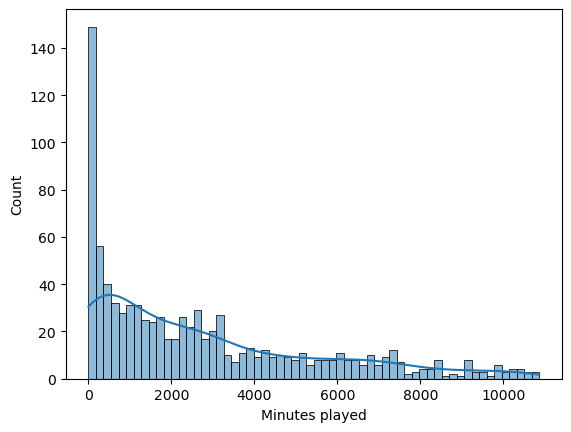

In [14]:
import seaborn as sns
sns.histplot(result_df['Minutes played'], kde = True, bins=60)

The mean value of minutes played for this dataset is 2737.


From the histogram we can see lots of players have played very few minutes (less than 500). We also know that players who haven't played enough minutes can skew the results with their statistics. For the type of data of data we are working with, accuracy increases with an in increase in value of minutes played. Therefore we are going to remove the playes that have played less than 1350 minutes. This means if a player hasnt played the number of minutes equivalent to 15 games over the course of last 3 seasons (114 games), hwe wont be included in the study.

In [15]:
print(len(result_df))
result_df = result_df[result_df['Minutes played']>1350].reset_index()
print(len(result_df))

896
516


In [16]:
result_df.head(5)

,index,Player,Age,Market value,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs,Count
0,0,A. Armstrong,52,24000000,53,3019,4,6.96,2,2.90,31.02,71.60,344,138,7.05,6.99,106.00,4.34,48.71,0.48,0.61,0.18,2.87,3.66,1.74,3,0.18,0,0.0,6.20,0.24,4,0.24,0.41,0,0.00,68,4.04,78.23,12.651,0.12,3.22,60.83,2.45,49.29,0.77,94.44,0.36,8.05,90.28,15.39,67.49,6.37,3.76,2.99,23.66,2.57,0.89,33.98,148.11,6.38,114.50,10.74,185.70,9.40,146.75,28.43,162.31,2.45,99.04,29.79,29.56,0.18,1.25,0.00,0.0,0.53,28.57,0.65,2.74,138.67,3.09,113.19,0.65,130.00,1.54,0.95,3.51,135.08,0,0.00,0,0.0,0,0.00,0.00,0.00,0.00,0.000,0.60,0.00,0.0,0.0,0.0,0.0,0.0,0,0.0,11.0,54.0,0.0,0.0,9.0,135.0,63.0,2
1,1,A. Aréola,90,24000000,42,3910,0,0.00,0,0.00,1.44,144.29,585,282,2.29,0.42,66.67,0.60,100.00,0.03,0.03,0.00,2.16,2.47,0.26,2,0.05,0,0.0,0.00,0.00,0,0.00,0.00,0,0.00,0,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.31,200.00,0.00,0.00,0.00,37.59,0.05,0.13,50.29,244.35,29.86,211.24,0.00,0.00,17.98,295.80,24.26,299.00,25.98,189.89,104.60,141.31,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.51,79.76,0.00,0.00,0.05,0.00,0.00,0.00,21.05,209.11,56,4.05,177,11.2,9,192.54,65.16,5.34,9.16,1.282,0.00,3.94,0.6,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,3,A. Barnes,66,2000000,45,2309,4,7.30,0,2.69,66.75,71.02,372,152,7.73,8.03,104.76,25.63,70.52,0.55,0.65,0.19,2.96,3.46,4.79,8,0.65,0,0.0,3.24,0.29,2,0.13,0.54,1,0.06,50,3.74,83.81,15.238,0.00,0.97,119.44,0.13,50.00,0.85,117.86,0.23,2.08,81.18,18.20,50.64,6.24,0.82,0.13,21.58,4.88,4.42,32.20,144.56,10.10,108.05,8.31,175.92,7.62,151.40,29.22,148.60,2.01,104.61,29.44,24.98,0.22,1.89,0.10,0.0,1.02,42.86,0.55,4.43,96.30,2.72,88.78,1.28,61.11,1.79,0.39,4.00,143.33,0,0.00,0,0.0,0,0.00,0.00,0.00,0.00,0.000,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2,20

In [17]:
# Checking for null values if any
result_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [18]:
# checking if we have any anomalies
# In truth there were some anomalies due to exact same names in the excel files, these were fixed 
# manually as there were very few.
result_df['Count'].value_counts()

3    249
2    143
1    124
Name: Count, dtype: int64

In [19]:
# Checking if our count column has worked correctly or not

result_df[(result_df['Player'] == 'Mohamed Salah') | (result_df['Player'] == 'E. Haaland')]

# The counts are correct since Erling Haaland has only played 1 season in the PL while Salah appeared
# in each of the last 3

,index,Player,Age,Market value,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs,Count
143,244,E. Haaland,22,170000000,35,2996,36,28.10,8,4.12,14.6,35.60,195,94,1.65,1.41,46.81,3.51,45.30,0.03,0.05,0.12,0.96,1.67,0.90,5,0.15,0,0.0,2.94,1.08,29,0.87,0.84,7,0.21,113,3.39,52.21,31.858,0.24,0.57,26.32,0.36,16.67,0.15,40.00,0.12,1.47,55.10,5.86,33.33,5.83,0.72,0.54,10.90,1.17,0.66,13.25,79.59,2.34,78.21,4.09,84.56,3.48,78.45,12.50,82.21,0.18,66.67,13.69,3.39,0.12,0.63,0.12,0.03,0.42,50.00,0.54,0.66,81.82,1.08,69.44,0.39,46.15,1.29,0.15,1.05,71.43,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.03,0.0,0.0,0.00,0.00,0.0,0.03,7,100.000,18.0,19.0,4.0,1.0,14.0,49.0,24.0,1
358,634,Mohamed Salah,90,210000000,110,9834,64,60.78,25,21.64,58.0,100.37,525,213,7.70,8.23,168.09,4.18,48.64,0.03,0.04,0.06,3.06,4.91,1.44,3,0.08,0,0.0,14.13,1.78,51,1.42,1.68,3,0.08,368,10.19,124.40,52.094,0.69,4.65,97.41,0.27,25.00,4.21,102.23,0.85,14.31,138.54,35.67,96.15,18.87,8.61,2.40,81.98,10.27,2.13,95.95,241.36,19.30,209.34,28.31,281.63,25.17,231.75,88.03,253.03,3.46,131.79,43.47,54.31,0.60,4.16,0.43,0.18,4.08,126.71,2.43,6.43,214.97,10.63,174.73,4.51,96.78,7.09,1.69,12.34,260.52,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.27,0.0,0.0,0.14,0.14,100.0,0.03,16,233.333,88.0,169.0,16.0,6.0,147.0,514.0,310.0,3


In [20]:
# Making a copy as an insurance to fall back on

result_df_copy = result_df.copy()

Now since we have performed a summation on all the columns, the per 90 metrics we need for our future calculations will not be accurate as discussed above. In the next codeblock we will recreate the per 90 metrics for the whole data sample (which is a combination of 3 seasons now).


For metrics like cross completion % which portray how often a certain action is successful, we will take an average.

In [21]:
per_90_cols = ['Goals per 90', 'xG per 90', 'Non-penalty goals per 90',
               'xA per 90', 'Assists per 90', 'Shots per 90','Key passes per 90', 
               'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
               'Smart passes per 90', 'Dribbles per 90', 'Progressive runs per 90']

per_90_eval = ['Goals', 'xG', 'Non-penalty goals',
               'xA', 'Assists', 'Shots','Key passes', 
               'Crosses', 'Second assists', 'Third assists',
               'Smart passes', 'Dribbles', 'Progressive runs']

perc_cols = ['Goal conversion, %', 'Shots on target, %', 'Accurate through passes, %',
            'Accurate crosses, %', 'Accurate smart passes, %', 'Successful dribbles, %']

In [22]:
for i,col in enumerate(per_90_cols):
    result_df[col] =( result_df[per_90_eval[i]] * 90) / result_df['Minutes played']
    
for col in perc_cols:
    result_df[col] = result_df[col]/result_df['Count']
    
result_df[result_df['Player'] == "B. Saka"]

,index,Player,Age,Market value,Matches played,Minutes played,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs,Count
63,98,B. Saka,63,330000000,108,9376,30,26.45,17,16.72,68.09,132.14,534,195,15.01,14.46,164.34,5.68,93.72,0.06,0.08,0.13,7.05,10.15,3.0,13,0.36,0,0.0,15.25,0.287969,26,0.249573,0.253893,1,0.03,229,2.198166,35.63,12.734333,0.163183,2.898891,33.096667,2.73,95.96,5.83,87.17,1.54,5.749787,56.706667,38.4,132.71,14.55,3.254053,2.68,75.23,5.23,5.45,97.32,239.37,19.8,207.94,26.78,277.89,27.86,238.65,85.13,256.34,3.6,174.11,47.08,61.61,0.160495,4.23,0.124787,0.086391,0.393558,36.893333,0.518345,5.73,229.36,7.69,162.63,1.21,33.73,4.0,2.92,10.87,213.54,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.21,0.0,0.0,0.93,0.06,0.0,6.23,5,166.667,54.0,302.0,13.0,9.0,41.0,599.0,339.0,3


In [23]:
result_df.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
# We have all the correct values now
# Creating some new metrics for better performance evaluation

result_df['xG per shot'] = np.round(result_df['xG']/result_df['Shots'], decimals = 4)
result_df['xG performance'] = result_df['Goals'] - result_df['xG']

# To fix the Nan values in case a player has 0 shots
result_df['xG per shot'] = result_df['xG per shot'].fillna(0)

In [25]:
# Z-score standardization

numeric_cols = result_df.select_dtypes(include=[np.number]).columns
df1 = result_df[numeric_cols].apply(zscore)
df1['Player'] = result_df['Player']

# We want the z-score values for the performance statistics only. For Age, matches and minutes we need
# the raw data

df1 = df1.drop(['Age','Matches played', 'Minutes played'], axis=1)
df1['Age'] = result_df['Age']
df1['Matches played'] = result_df['Matches played']
df1['Minutes played'] = result_df['Minutes played']
print(len(df1))
df1.head()

516


,index,Market value,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs,Count,xG per shot,xG performance,Player,Age,Matches played,Minutes played
0,-1.705567,-0.430657,-0.184923,0.126146,-0.318484,-0.150654,-0.261582,-0.838356,-0.435510,-0.510151,-1.043717,-0.742942,-0.465355,-0.460991,-0.975233,-0.309344,-0.334673,-0.643231,-1.161464,-1.161077,-0.238220,-0.748188,-0.604549,-0.437489,-0.317254,0.437211,0.078055,-0.145379,0.155221,0.691533,-0.535905,-0.537319,0.381982,1.323547,0.592350,-0.311094,-0.111451,0.306194,0.179961,0.570167,-0.040988,-0.312679,0.801841,-0.029612,1.149699,-0.322867,0.328116,-0.626570,0.741385,0.644672,1.366660,-0.952513,0.058000,-0.695847,-1.001305,-0.493326,-1.178254,-0.691800,-0.261583,-0.125302,-0.915459,-0.593989,-0.978566,-0.441180,-0.865719,-0.374449,-0.639526,-1.009818,0.248713,-0.073694,-0.906208,-0.808955,-0.242651,-0.809939,0.241177,-0.966572,-0.179091,-0.210354,0.313258,-0.546477,2.132976,0.025907,0.086345,-1.196217,-0.331117,-0.236808,-0.249310,-0.234022,-0.249922,-0.214656,-0.248717,-0.235824,-0.249281,-0.018065,-0.020399,-0.466032,-0.246286,-0.242326,-0.452727,-0.395004,-0.390073,-0.445989,-0.296432,-0.362393,-0.167784,-0.092064,-0.778544,-0.728524,-0.355311,0.367376,0.004924,-0.297246,-0.086245,-1.056171,A. Armstrong,52,53,3019
1,-1.701779,-0.430657,-0.652668,-0.739585,-0.754392,-0.802081,-1.798730,0.591355,1.179324,1.745369,-1.602503,-1.740530,-1.217691,-1.187026,-0.058805,-1.063067,-1.044834,-0.920064,-1.316310,-1.349559,-1.434142,-0.941220,-1.171647,-0.437489,-0.317254,-1.085112,-0.801653,-0.678347,-0.824422,-0.936604,-0.535905,-0.537319,-0.902689,-1.226131,-2.064364,-1.036992,-0.957252,-1.053023,-1.788896,-0.636646,-1.149214,-0.650040,-1.206684,-0.798937,-1.131983,-2.870485,-1.091467,2.169028,-0.982151,-1.352353,-0.989643,-0.587202,-1.04

In [26]:
df1.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
# Creating a new dataframe and removing all the columns we dont need for our statistical modelling

df2 = df1[['Player', 'Age', 'Minutes played', 'Goals per 90', 'xG per 90', 'Non-penalty goals per 90',
           'xA per 90', 'Assists per 90', 'Shots per 90', 'Shots on target, %',
           'Goal conversion, %', 'xG per shot', 'xG performance', 'Key passes per 90', 'Accurate through passes, %',
           'Accurate crosses, %', 'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
           'Smart passes per 90', 'Accurate smart passes, %', 'Dribbles per 90', 'Progressive runs per 90',
           'Successful dribbles, %', 'Successful defensive actions per 90',
          ]]

In [28]:
df1[df1['Player'] == "B. Saka"]

,index,Market value,Goals,xG,Assists,xA,Duels per 90,"Duels won, %",Height,Weight,Successful defensive actions per 90,Defensive duels per 90,"Defensive duels won, %",Aerial duels per 90,"Aerial duels won, %",Sliding tackles per 90,PAdj Sliding tackles,Shots blocked per 90,Interceptions per 90,PAdj Interceptions,Fouls per 90,Yellow cards,Yellow cards per 90,Red cards,Red cards per 90,Successful attacking actions per 90,Goals per 90,Non-penalty goals,Non-penalty goals per 90,xG per 90,Head goals,Head goals per 90,Shots,Shots per 90,"Shots on target, %","Goal conversion, %",Assists per 90,Crosses per 90,"Accurate crosses, %",Crosses from left flank per 90,"Accurate crosses from left flank, %",Crosses from right flank per 90,"Accurate crosses from right flank, %",Crosses to goalie box per 90,Dribbles per 90,"Successful dribbles, %",Offensive duels per 90,"Offensive duels won, %",Touches in box per 90,Progressive runs per 90,Accelerations per 90,Received passes per 90,Received long passes per 90,Fouls suffered per 90,Passes per 90,"Accurate passes, %",Forward passes per 90,"Accurate forward passes, %",Back passes per 90,"Accurate back passes, %",Lateral passes per 90,"Accurate lateral passes, %",Short / medium passes per 90,"Accurate short / medium passes, %",Long passes per 90,"Accurate long passes, %","Average pass length, m","Average long pass length, m",xA per 90,Shot assists per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Key passes per 90,Passes to final third per 90,"Accurate passes to final third, %",Passes to penalty area per 90,"Accurate passes to penalty area, %",Through passes per 90,"Accurate through passes, %",Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,"Accurate progressive passes, %",Conceded goals,Conceded goals per 90,Shots against,Shots against per 90,Clean sheets,"Save rate, %",xG against,xG against per 90,Prevented goals,Prevented goals per 90,Back passes received as GK per 90,Exits per 90,Aerial duels per 902,Free kicks per 90,Direct free kicks per 90,"Direct free kicks on target, %",Corners per 90,Penalties taken,"Penalty conversion, %",Key passes,Crosses,Second assists,Third assists,Smart passes,Dribbles,Progressive runs,Count,xG per shot,xG performance,Player,Age,Matches played,Minutes played
63,-1.334323,5.329826,2.855421,2.550444,2.950831,2.953732,1.664789,0.352382,0.837596,0.382659,-0.109277,0.391303,0.650619,-0.200861,-0.171013,-1.012819,-0.983613,-0.720129,-0.249835,-0.133138,0.77993,1.182137,0.180663,-0.437489,-0.317254,2.659311,1.322791,2.78595,1.225922,1.055688,0.02959,-0.172187,3.423629,1.538629,0.355646,0.424368,1.35765,1.394616,0.353554,0.708089,1.008331,1.90427,0.647225,2.492065,2.127837,0.329934,2.494205,0.749393,2.954655,2.107743,1.122361,0.399898,1.218982,2.36327,0.297301,0.81028,-0.404293,0.808763,1.529609,0.931964,-0.080713,0.625408,0.288508,0.825701,-0.683422,1.086846,0.276867,-0.079063,1.428451,2.246487,2.400822,2.44213,0.115152,0.21837,1.090772,-0.549454,1.259674,1.17297,1.277443,-0.104239,0.185959,1.692662,2.107323,-0.22897,0.940876,-0.236808,-0.24931,-0.234022,-0.249922,-0.214656,-0.248717,-0.235824,-0.249281,-0.018065,-0.020399,-0.674507,-0.246286,-0.242326,0.580393,-0.06617,-0.390073,2.696116,2.116167,2.808242,2.591876,3.168713,4.935321,5.207029,0.948154,4.589048,4.360503,0.929786,0.142062,1.592861,B. Saka,63,108,9376


In [29]:
# Copy for insurance

df3 = df2.copy()

In [30]:
print(len(df2))
df2.head(5)

516


,Player,Age,Minutes played,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Successful defensive actions per 90
0,A. Armstrong,52,3019,0.078055,0.691533,0.155221,0.248713,-0.111451,1.323547,0.592350,-0.311094,-0.086245,-1.056171,0.241177,2.132976,0.179961,0.306194,-0.906208,-0.808955,-0.242651,-0.809939,1.149699,0.644672,-0.322867,-1.043717
1,A. Aréola,90,3910,-0.801653,-0.936604,-0.824422,-1.128758,-0.957252,-1.226131,-2.064364,-1.036992,-1.870873,0.148304,-1.221901,-1.914229,-1.788896,-1.053023,-0.906208,-0.808955,-1.009066,-1.459672,-1.131983,-1.352353,-2.870485,-1.602503
2,A. Barnes,66,2309,0.348558,1.296165,-0.183984,0.541855,-0.957252,1.225108,0.781848,-0.162655,0.673616,-1.194523,-0.004561,-0.011731,2.076965,-0.625186,0.126764,-0.808955,0.327042,-0.484958,-0.535327,-0.937893,-0.579660,-0.963891
3,A. Bella-Kotchap,21,2064,-0.801653,-0.443887,-0.824422,-0.836957,0.279896,-0.568002,-0.932128,-1.036992,0.220488,-0.437657,-0.832804,0.052090,1.447759,-0.979389,-0.906208,-0.808955,-0.884507,3.088690,-0.810604,-0.517771,0.602719,-0.453235
4,A. Broja,42,2470,1.080014,1.076288,1.271002,-0.606250,-0.957252,0.927843,2.911158,1.198082,0.739842,0.132027,-0.734191,-1.914229,-0.288059,-0.253125,0.059432,-0.808955,-0.592727,-1.459672,1.243682,0.817334,-0.122794,-0.899325


In [31]:
# Scaling the data from z-score values to a range of 1-100 for easier interpretation

# Min-Max scaler
scaler = MinMaxScaler(feature_range=(0, 100))

# iloc because we need not scale the player matches and minutes played column
scaled_data = scaler.fit_transform(df2.iloc[:,3:])

scaled_df = pd.DataFrame(scaled_data, columns=df2.iloc[:,3:].columns)

In [32]:
# Copy for insurance and adding the the unscaled player and minutes played data back

scaled_df2 = scaled_df.copy()
scaled_df['Player'] = df2['Player']
scaled_df['Minutes played'] = df2['Minutes played']

In [33]:
scaled_copy = scaled_df.copy()
scaled_df.columns

Index(['Goals per 90', 'xG per 90', 'Non-penalty goals per 90', 'xA per 90',
       'Assists per 90', 'Shots per 90', 'Shots on target, %',
       'Goal conversion, %', 'xG per shot', 'xG performance',
       'Key passes per 90', 'Accurate through passes, %',
       'Accurate crosses, %', 'Crosses per 90', 'Second assists per 90',
       'Third assists per 90', 'Smart passes per 90',
       'Accurate smart passes, %', 'Dribbles per 90',
       'Progressive runs per 90', 'Successful dribbles, %',
       'Successful defensive actions per 90', 'Player', 'Minutes played'],
      dtype='object')

## Statistical Modelling part 1

For the first part in our modelling, we create new bins that help evaluate specific areas of performance better than just 1 KPI.

Goals bin incorporates an advanced metric Expected Goals alongside goals and non-penalty goals. The weights assigned to different metrics for different bins can be seen in the next codeblock.

Each bin evaluates a specific area of wing play.

### Now we create 6 new bins


Goals bin - xG(30), Non-penalty goals(40), Goals(30)


Assists bin - xA(50), Assists(50)


Shooting(S) - Shots(15), Shots on target %(25), Goal conversion %(35), xG per shot (25)


Chance creation(CC) - Key Passes(25), Through balls(25), Crossing %(25), Succ crosses(25)


Passing - Second assists(25) , Third Assists(25), Smart Passes(25), Smart pass success % (25)


Dribbling - Dribbles(30), Progressive Runs(30), Successful dribbles % (40)



Notes - All values are either per 90 values or % success rate.



So we've got 6 bins and the weight given to every column inside the bins

In [34]:
# Bin creation

scaled_df['Goals bin'] = scaled_df['xG per 90']*0.3 + scaled_df['Non-penalty goals per 90']*0.4 + \
                         scaled_df['Goals per 90']*0.3

scaled_df['Assists bin'] = scaled_df['xA per 90']*0.5 + scaled_df['Assists per 90']*0.5

scaled_df['Shooting'] = scaled_df['Shots per 90']*0.2 + scaled_df['Shots on target, %']*0.2 + \
                     scaled_df['Goal conversion, %']*0.2 + scaled_df['xG per shot']*0.2 + \
                     scaled_df['xG performance']*0.2

scaled_df['Chance creation'] = scaled_df['Key passes per 90']*0.25 + scaled_df['Accurate through passes, %']*0.25 + \
                             scaled_df['Accurate crosses, %']*0.25 + scaled_df['Crosses per 90']*0.25

scaled_df['Passing'] = scaled_df['Second assists per 90']*0.25 + scaled_df['Third assists per 90']*0.25 + \
                       scaled_df['Smart passes per 90']*0.25 + scaled_df['Accurate smart passes, %']*0.25

scaled_df['Dribbling'] = scaled_df['Dribbles per 90']*0.30 + scaled_df['Progressive runs per 90']*0.30 + \
                         scaled_df['Successful dribbles, %']*0.40



In [35]:
new_cols = ['Goals bin','Assists bin','Shooting','Chance creation','Passing','Dribbling']
scaled_df = scaled_df[new_cols].apply(zscore)
print(len(scaled_df))

516


In [36]:
# Next step is to standardize and scale the new bins, the same way we did for our performance metrics

new_cols = ['Goals bin','Assists bin','Shooting','Chance creation','Passing','Dribbling']
scaled_df = scaled_df[new_cols].apply(zscore)
scaled_df['Player'] = scaled_copy['Player']
scaled_df = scaled_df.merge(scaled_copy, on='Player', how = 'inner')

In [37]:
new_df = scaled_df.iloc[:,0:6]

In [38]:
new_scaler = MinMaxScaler(feature_range=(0, 100))

# Fit and transform your DataFrame with the scaler
new_scaled_data = scaler.fit_transform(new_df)

# Create a new DataFrame with the scaled values
scaled_df = pd.DataFrame(new_scaled_data, columns = new_df.columns)

scaled_df.head()

,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling
0,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554
3,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943
4,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458


In [39]:
# Adding back the player name and minutes played

scaled_df['Player'] = scaled_copy['Player']
scaled_df['Minutes played'] = scaled_copy['Minutes played']
scaled_df.head()

,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Player,Minutes played
0,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542,A. Armstrong,3019
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,A. Aréola,3910
2,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554,A. Barnes,2309
3,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943,A. Bella-Kotchap,2064
4,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458,A. Broja,2470


In [40]:
scaled_df[scaled_df['Player'] == "B. Saka"]

,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Player,Minutes played
63,28.471108,42.974452,55.583751,62.761522,71.981879,70.958487,B. Saka,9376


## Statistical Modelling part 2
In this step we create our final weighted index. This metric is the amalgamation of all the important performance metrics used to evaluate a winger. This will be used to rank all the wingers in the Premier League over the past 3 years and help us answer our questions.

But we dont just create 1 weighted index. We create 4 different ones. This is because different teams have different playing styles. One team might want their winger to be involved in goals for the most part, leaving the creative burden for his teammates while other team might want their wingers to be very creative and focus on creating chances instead of scoring goals.

Hence why we create the following 4 Weighted Indexes (WI)

1- WI All Rounder - As the name suggests, this is an all rounder. And a good all rounder can be utilised in any attacking system.

2 - WI Goalscorer - The goalscorer's most important task is to score goals. He is not too worried about his team's chance creation.

3 - WI Creator - Primarily involved in chance creation dynamics for his team.

4 - Dribbler - The dribbler is the profile whose main job is to take on his man and put in consistent crosses and cutbacks. This one is slightly similar to a chance creator

When using this model for recruitmen purposes, the weights can be adjusted to a custom setting to suit the requirements of the team

Next step is assigning weights to the bins to create the final metric, the be all, end all

Note - These values can be adjusted depending on the profile we want, for example, if we wanted a winger
who has very creative and a top end dribbler but we don't care too much about his goal outputs then
we would put more emphasis on the assists bin, chance creation, passing and dribbling and less emphasis
on shooting and goals and so on and so forth

We'll create multiple metrics with different weightage for different profiles

All rounder - Goals Bin(0.2), Assists Bin(0.2), Shooting(0.2), CC(0.125) Passing(0.125), Dribbling(0.15)


Goalscorer - Goals Bin(0.25), Assists Bin(0.1), Shooting(0.25), CC(0.1) Passing(0.1), Dribbling(0.2)


Creator -Goals Bin(0.1), Assists Bin(0.25), Shooting(0.1), CC(0.25) Passing(0.2), Dribbling(0.1)


Dribbler - Goals Bin(0.1), Assists Bin(0.15), Shooting(0.15), CC(0.2) Passing(0.1), Dribbling(0.3)

In [41]:
final_df = scaled_df.copy()
final_df['WI All Rounder'] = scaled_df['Goals bin']*0.2 + scaled_df['Assists bin']*0.2 + \
                        scaled_df['Shooting']*0.2 + scaled_df['Chance creation']*0.125 + \
                        scaled_df['Passing']*0.125 + scaled_df['Dribbling']*0.15

final_df['WI Goalscorer'] = scaled_df['Goals bin']*0.25 + scaled_df['Assists bin']*0.1 + \
                        scaled_df['Shooting']*0.25 + scaled_df['Chance creation']*0.1 + \
                        scaled_df['Passing']*0.1 + scaled_df['Dribbling']*0.2

final_df['WI Creator'] = scaled_df['Goals bin']*0.1 + scaled_df['Assists bin']*0.25 + \
                        scaled_df['Shooting']*0.1 + scaled_df['Chance creation']*0.25 + \
                        scaled_df['Passing']*0.2 + scaled_df['Dribbling']*0.1

final_df['WI Dribbler'] = scaled_df['Goals bin']*0.1 + scaled_df['Assists bin']*0.1 + \
                        scaled_df['Shooting']*0.15 + scaled_df['Chance creation']*0.2 + \
                        scaled_df['Passing']*0.1 + scaled_df['Dribbling']*0.35

In [42]:
final_df = final_df[['Player',
       'Minutes played', 'WI All Rounder', 'WI Goalscorer',
       'WI Creator', 'WI Dribbler','Goals bin', 'Assists bin', 'Shooting',
       'Chance creation', 'Passing', 'Dribbling']]

In [43]:
final_df.head()

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling
0,A. Armstrong,3019,31.993406,33.743379,32.713487,40.353604,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542
1,A. Aréola,3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,A. Barnes,2309,29.059567,30.384529,29.586760,31.607246,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554
3,A. Bella-Kotchap,2064,22.726150,22.446163,26.968042,29.233318,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943
4,A. Broja,2470,32.051165,38.460296,22.813239,37.092209,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458


In [44]:
final_df[final_df["Player"] == "B. Saka"]

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling
63,B. Saka,9376,52.89256,52.977198,56.331704,60.068081,28.471108,42.974452,55.583751,62.761522,71.981879,70.958487


In [45]:
final_df[final_df['Minutes played'] > 2000].sort_values('WI All Rounder', ascending = False)

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling
270,K. De Bruyne,7098,73.715171,66.667302,85.904262,74.513212,34.331911,100.000000,62.843642,100.000000,100.000000,61.867069
143,E. Haaland,2996,68.384469,72.867773,59.418630,58.389906,100.000000,46.819701,100.000000,49.545457,58.078079,37.117248
358,Mohamed Salah,9834,64.308348,64.675447,64.708482,63.611441,57.448571,56.307854,74.508541,61.333241,80.943115,59.138737
214,J. Grealish,6602,61.585556,58.654168,69.920276,72.281054,20.888678,67.744785,47.811666,79.150193,86.211370,90.842234
422,R. Mahrez,5767,60.763308,58.919683,64.806047,64.373422,38.143854,67.014657,60.735606,70.661955,68.552466,67.884549
...,...,...,...,...,...,...,...,...,...,...,...,...
147,E. Mendy,7181,0.006959,0.009279,0.004639,0.016237,0.000000,0.000000,0.000000,0.000000,0.000000,0.046393
318,M. Dúbravka,4006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
375,Neto,2615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,A. Aréola,3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Data Wrangling part 2

In [46]:
# Adding the team name and age to our output dataset


df3_extra = raw_df3[['Player','Age','Team']]

df2_extra = raw_df2[['Player','Age','Team']]

df1_extra = raw_df1[['Player','Age','Team']]

total_extra = pd.concat([df1_extra, df2_extra, df3_extra],ignore_index=True, sort=False)
len(total_extra)

1614

In [47]:
# Removing all the duplicate values

duplis = total_extra.duplicated()
dupli_rows = total_extra[duplis]
no_dupli_rows = total_extra.drop_duplicates()
final_df_2 = final_df.merge(no_dupli_rows, on='Player', how='left')
print(len(final_df_2))
final_df_2.head()

546


,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team
0,A. Armstrong,3019,31.993406,33.743379,32.713487,40.353604,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542,26,Southampton
1,A. Aréola,3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,West Ham United
2,A. Barnes,2309,29.059567,30.384529,29.586760,31.607246,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554,33,Burnley
3,A. Bella-Kotchap,2064,22.726150,22.446163,26.968042,29.233318,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943,21,Southampton
4,A. Broja,2470,32.051165,38.460296,22.813239,37.092209,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458,21,Chelsea


In [48]:
final_df_2[final_df_2['Player'] == "B. Saka"]

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team
64,B. Saka,9376,52.89256,52.977198,56.331704,60.068081,28.471108,42.974452,55.583751,62.761522,71.981879,70.958487,21,Arsenal


In [49]:
# Taking a peek into our output dataset, some familiar names
final_df_2[final_df_2['Age'] <24].sort_values('WI All Rounder', ascending=False).head(5)

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team
151,E. Haaland,2996,68.384469,72.867773,59.418630,58.389906,100.000000,46.819701,100.000000,49.545457,58.078079,37.117248,22,Manchester City
419,P. Foden,6035,59.352251,58.917996,61.233366,62.380984,41.218584,59.499677,70.111913,73.074103,53.619165,62.330384,23,Manchester City
183,Gabriel Martinelli,5658,53.689658,53.884929,53.971283,58.539761,35.680560,55.218862,61.721084,59.036762,44.084899,68.502326,21,Arsenal
358,M. Olise,4231,53.040270,48.275502,61.339488,61.428439,9.578371,78.325779,38.780517,68.604956,60.163747,77.381660,21,Crystal Palace
85,C. Hudson-Odoi,2152,52.988725,51.095502,60.563940,66.881536,15.573038,56.631144,39.925969,87.880623,50.008737,88.843497,22,Bayer Leverkusen


In [50]:
# Adding the raw numbers alongside our player names, in case we need them to create a dashboard down
# the line

raw_no_cols = ['Player','Goals per 90', 'xG per 90',
       'Non-penalty goals per 90', 'xA per 90', 'Assists per 90',
       'Shots per 90', 'Shots on target, %', 'Goal conversion, %',
       'xG per shot', 'xG performance', 'Key passes per 90',
       'Accurate through passes, %', 'Accurate crosses, %', 'Crosses per 90',
       'Second assists per 90', 'Third assists per 90', 'Smart passes per 90',
       'Accurate smart passes, %', 'Dribbles per 90',
       'Progressive runs per 90', 'Successful dribbles, %']
raw_nos_df = result_df[raw_no_cols]
complete_df = final_df_2.merge(raw_nos_df, on='Player', how='left')
complete_df.head()

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %"
0,A. Armstrong,3019,31.993406,33.743379,32.713487,40.353604,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542,26,Southampton,0.119245,0.207486,0.119245,0.086452,0.059622,2.027161,39.115,6.3255,0.1024,-2.96,0.327923,65.000,30.415,1.609805,0.000000,0.0,0.268301,14.285,4.024511,1.878105,45.140
1,A. Aréola,3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,West Ham United,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000
2,A. Barnes,2309,29.059567,30.384529,29.586760,31.607246,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554,33,Burnley,0.155912,0.284539,0.077956,0.104851,0.000000,1.948896,41.905,7.6190,0.1460,-3.30,0.272845,30.555,59.720,0.506713,0.038978,0.0,0.467735,21.430,1.052404,0.389779,40.590
3,A. Bella-Kotchap,2064,22.726150,22.446163,26.968042,29.233318,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943,21,Southampton,0.000000,0.062791,0.000000,0.018314,0.087209,0.523256,16.670,0.0000,0.1200,-1.44,0.087209,31.580,50.000,0.087209,0.000000,0.0,0.043605,100.000,0.566860,0.784884,61.540
4,A. Broja,2470,32.051165,38.460296,22.813239,37.092209,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458,21,Chelsea,0.255061,0.256518,0.255061,0.032794,0.000000,1.712551,73.255,19.4765,0.1498,-0.04,0.109312,0.000,23.185,0.947368,0.036437,0.0,0.145749,0.000,4.190283,2.040486,48.685


In [51]:
# Our Final Data Wrangling task is to add positions of the player to our dataset to easily filter
# out wingers from any other position. Can also be useful in the future 

combined_df = pd.concat([raw_df1, raw_df2, raw_df3], ignore_index=True)

# Splitting the "Position" column into a list of positions
combined_df['Position'] = combined_df['Position'].str.split(',')

grouped = combined_df.groupby('Player')['Position'].agg(sum).reset_index()
grouped.head()

# Create a new column "Winger?" for easy filter
grouped['Winger?'] = grouped['Position'].apply(lambda positions: 1 if any(pos.strip() in ['RW', 'LW','RWF','LWF','LAMF','RAMF',] for pos in positions) else 0)

complete_df = complete_df.merge(grouped, on='Player', how='left')

complete_df.head(5)

,Player,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Position,Winger?
0,A. Armstrong,3019,31.993406,33.743379,32.713487,40.353604,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542,26,Southampton,0.119245,0.207486,0.119245,0.086452,0.059622,2.027161,39.115,6.3255,0.1024,-2.96,0.327923,65.000,30.415,1.609805,0.000000,0.0,0.268301,14.285,4.024511,1.878105,45.140,"[CF, CF, LW, LAMF]",1
1,A. Aréola,3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,West Ham United,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,0.00,0.000000,0.000,0.000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000,"[GK, GK, GK]",0
2,A. Barnes,2309,29.059567,30.384529,29.586760,31.607246,18.016935,15.336083,48.160356,48.017596,22.521277,26.263554,33,Burnley,0.155912,0.284539,0.077956,0.104851,0.000000,1.948896,41.905,7.6190,0.1460,-3.30,0.272845,30.555,59.720,0.506713,0.038978,0.0,0.467735,21.430,1.052404,0.389779,40.590,"[CF, CF]",0
3,A. Bella-Kotchap,2064,22.726150,22.446163,26.968042,29.233318,2.231565,13.099781,20.711038,35.935027,43.410426,37.329943,21,Southampton,0.000000,0.062791,0.000000,0.018314,0.087209,0.523256,16.670,0.0000,0.1200,-1.44,0.087209,31.580,50.000,0.087209,0.000000,0.0,0.043605,100.000,0.566860,0.784884,61.540,"[RCB, LCB]",0
4,A. Broja,2470,32.051165,38.460296,22.813239,37.092209,27.903458,4.796580,70.588121,19.207756,8.296759,53.036458,21,Chelsea,0.255061,0.256518,0.255061,0.032794,0.000000,1.712551,73.255,19.4765,0.1498,-0.04,0.109312,0.000,23.185,0.947368,0.036437,0.0,0.145749,0.000,4.190283,2.040486,48.685,"[CF, CF]",0


In [52]:
len(complete_df)

546

In [53]:
# Rearranging the columns

complete_df.columns
complete_df = complete_df[['Player', 'Position', 'Minutes played', 'WI All Rounder', 'WI Goalscorer',
       'WI Creator', 'WI Dribbler', 'Goals bin', 'Assists bin', 'Shooting',
       'Chance creation', 'Passing', 'Dribbling', 'Age', 'Team',
       'Goals per 90', 'xG per 90', 'Non-penalty goals per 90', 'xA per 90',
       'Assists per 90', 'Shots per 90', 'Shots on target, %',
       'Goal conversion, %', 'xG per shot', 'xG performance',
       'Key passes per 90', 'Accurate through passes, %',
       'Accurate crosses, %', 'Crosses per 90', 'Second assists per 90',
       'Third assists per 90', 'Smart passes per 90',
       'Accurate smart passes, %', 'Dribbles per 90',
       'Progressive runs per 90', 'Successful dribbles, %',
       'Winger?']]
complete_df.head(2)

,Player,Position,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Winger?
0,A. Armstrong,"[CF, CF, LW, LAMF]",3019,31.993406,33.743379,32.713487,40.353604,16.157143,19.769638,43.477402,59.420556,9.964149,49.596542,26,Southampton,0.119245,0.207486,0.119245,0.086452,0.059622,2.027161,39.115,6.3255,0.1024,-2.96,0.327923,65.0,30.415,1.609805,0.0,0.0,0.268301,14.285,4.024511,1.878105,45.14,1
1,A. Aréola,"[GK, GK, GK]",3910,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30,West Ham United,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.0000,0.0000,0.00,0.000000,0.0,0.000,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.000000,0.00,0


In [54]:
# Final dataset
complete_df.sort_values('WI All Rounder', ascending=False).head()

,Player,Position,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Winger?
287,K. De Bruyne,"[AMF, RCMF, RCMF, AMF, LCMF, RCMF, AMF]",7098,73.715171,66.667302,85.904262,74.513212,34.331911,100.000000,62.843642,100.000000,100.000000,61.867069,31,Manchester City,0.355030,0.262975,0.329670,0.341843,0.418428,2.789518,34.996667,12.726000,0.0943,7.26,1.306002,35.730000,27.890000,4.970414,0.101437,0.063398,2.979713,43.106667,3.651733,2.814877,60.126667,0
151,E. Haaland,[CF],2996,68.384469,72.867773,59.418630,58.389906,100.000000,46.819701,100.000000,49.545457,58.078079,37.117248,22,Manchester City,1.081442,0.844126,0.871162,0.123765,0.240320,3.394526,52.210000,31.858000,0.2487,7.90,0.540721,46.150000,26.320000,0.570761,0.120160,0.030040,0.420561,50.000000,1.471963,0.720961,55.100000,0
382,Mohamed Salah,"[RWF, CF, RWF, RWF, CF]",9834,64.308348,64.675447,64.708482,63.611441,57.448571,56.307854,74.508541,61.333241,80.943115,59.138737,30,Liverpool,0.585723,0.556254,0.466748,0.198048,0.228798,3.367907,41.466667,17.364667,0.1652,3.22,0.805369,32.260000,32.470000,1.546675,0.146431,0.054912,1.345333,42.236667,4.704088,2.837096,46.180000,1
226,J. Grealish,"[LAMF, AMF, LW, LWF, CF, LAMF, LWF, LAMF,...",6602,61.585556,58.654168,69.920276,72.281054,20.888678,67.744785,47.811666,79.150193,86.211370,90.842234,27,Manchester City,0.190851,0.192214,0.190851,0.262693,0.245380,1.785822,39.686667,10.681000,0.1076,-0.10,1.008785,56.560000,26.810000,2.140261,0.095426,0.095426,0.967889,55.400000,6.175401,5.357467,64.950000,1
449,R. Mahrez,"[RWF, RAMF, RWF, RAMF, RAMF, RWF, RW]",5767,60.763308,58.919683,64.806047,64.373422,38.143854,67.014657,60.735606,70.661955,68.552466,67.884549,32,Manchester City,0.390151,0.365493,0.312121,0.241425,0.265303,2.496965,37.703333,15.239333,0.1464,1.58,0.671059,38.976667,34.473333,2.980753,0.078030,0.062424,0.686666,56.646667,5.103173,3.199237,56.073333,1


In [55]:
# Filtering out the wingers who have played a minimum of 2000 minutes in the past 4 seasons 
# 2000 minutes is equivalent to 22 full games and a little more.
# We do this because players who have played very little football over this time skew the data with
# their statistics

complete_filtered_df = complete_df[(complete_df['Minutes played']>2000) & (complete_df['Winger?']==1)]

In [56]:
complete_filtered_df[complete_filtered_df['Player'] == "B. Saka"]

,Player,Position,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Winger?
64,B. Saka,"[RAMF, LWB, LAMF, RAMF, RW, RWF, RAMF, RW]",9376,52.89256,52.977198,56.331704,60.068081,28.471108,42.974452,55.583751,62.761522,71.981879,70.958487,21,Arsenal,0.287969,0.253893,0.249573,0.160495,0.163183,2.198166,35.63,12.734333,0.1155,3.55,0.518345,33.73,33.096667,2.898891,0.124787,0.086391,0.393558,36.893333,5.749787,3.254053,56.706667,1


In [57]:
# Creating a rank column for the different profiles

complete_filtered_df['All rounder rank'] = complete_filtered_df['WI All Rounder'].rank(ascending=False).astype(int)
complete_filtered_df['Goalscorer rank'] = complete_filtered_df['WI Goalscorer'].rank(ascending=False).astype(int)
complete_filtered_df['Creator rank'] = complete_filtered_df['WI Creator'].rank(ascending=False).astype(int)
complete_filtered_df['Dribbler rank'] = complete_filtered_df['WI Dribbler'].rank(ascending=False).astype(int)

In [58]:
print('The top 5 wingers in the PL are')
complete_filtered_df.sort_values('All rounder rank').head()

The top 5 wingers in the PL are


,Player,Position,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Winger?,All rounder rank,Goalscorer rank,Creator rank,Dribbler rank
382,Mohamed Salah,"[RWF, CF, RWF, RWF, CF]",9834,64.308348,64.675447,64.708482,63.611441,57.448571,56.307854,74.508541,61.333241,80.943115,59.138737,30,Liverpool,0.585723,0.556254,0.466748,0.198048,0.228798,3.367907,41.466667,17.364667,0.1652,3.22,0.805369,32.260000,32.470000,1.546675,0.146431,0.054912,1.345333,42.236667,4.704088,2.837096,46.180000,1,1,1,3,5
226,J. Grealish,"[LAMF, AMF, LW, LWF, CF, LAMF, LWF, LAMF,...",6602,61.585556,58.654168,69.920276,72.281054,20.888678,67.744785,47.811666,79.150193,86.211370,90.842234,27,Manchester City,0.190851,0.192214,0.190851,0.262693,0.245380,1.785822,39.686667,10.681000,0.1076,-0.10,1.008785,56.560000,26.810000,2.140261,0.095426,0.095426,0.967889,55.400000,6.175401,5.357467,64.950000,1,2,5,1,1
449,R. Mahrez,"[RWF, RAMF, RWF, RAMF, RAMF, RWF, RW]",5767,60.763308,58.919683,64.806047,64.373422,38.143854,67.014657,60.735606,70.661955,68.552466,67.884549,32,Manchester City,0.390151,0.365493,0.312121,0.241425,0.265303,2.496965,37.703333,15.239333,0.1464,1.58,0.671059,38.976667,34.473333,2.980753,0.078030,0.062424,0.686666,56.646667,5.103173,3.199237,56.073333,1,3,3,2,4
419,P. Foden,"[LWF, LCMF, LAMF, CF, LWF, LAMF, LWF, RWF...",6035,59.352251,58.917996,61.233366,62.380984,41.218584,59.499677,70.111913,73.074103,53.619165,62.330384,23,Manchester City,0.417564,0.294383,0.417564,0.236222,0.208782,2.117647,43.640000,20.348333,0.1390,8.26,0.775476,45.043333,26.146667,2.997514,0.104391,0.014913,0.790389,45.433333,3.847556,2.535211,63.503333,1,4,4,7,8
318,L. Díaz,"[LWF, RWF, LWF]",2110,56.622865,56.301378,59.823663,61.731651,37.094508,49.691393,55.378653,59.160924,81.428932,70.774815,26,Liverpool,0.341232,0.336540,0.341232,0.165498,0.213270,2.559242,33.145000,13.714500,0.1315,0.11,0.853081,37.500000,25.000000,1.151659,0.042654,0.085308,0.170616,100.000000,5.843602,3.071090,58.175000,1,5,7,9,9


In [59]:
complete_filtered_df[complete_filtered_df['Player'] == 'L. Díaz']

,Player,Position,Minutes played,WI All Rounder,WI Goalscorer,WI Creator,WI Dribbler,Goals bin,Assists bin,Shooting,Chance creation,Passing,Dribbling,Age,Team,Goals per 90,xG per 90,Non-penalty goals per 90,xA per 90,Assists per 90,Shots per 90,"Shots on target, %","Goal conversion, %",xG per shot,xG performance,Key passes per 90,"Accurate through passes, %","Accurate crosses, %",Crosses per 90,Second assists per 90,Third assists per 90,Smart passes per 90,"Accurate smart passes, %",Dribbles per 90,Progressive runs per 90,"Successful dribbles, %",Winger?,All rounder rank,Goalscorer rank,Creator rank,Dribbler rank
318,L. Díaz,"[LWF, RWF, LWF]",2110,56.622865,56.301378,59.823663,61.731651,37.094508,49.691393,55.378653,59.160924,81.428932,70.774815,26,Liverpool,0.341232,0.33654,0.341232,0.165498,0.21327,2.559242,33.145,13.7145,0.1315,0.11,0.853081,37.5,25.0,1.151659,0.042654,0.085308,0.170616,100.0,5.843602,3.07109,58.175,1,5,7,9,9


## Data Visualization
The final dataset (complete_filtered_df) was exported as an excel sheet and subsqeuntly imported into Tableau to perform our visualisations. This is done because we want to build a player dashboard and it is much easier to do that in Tableau.

In [60]:
# complete_filtered_df.to_excel('Weighted Index Wingers Final.xlsx', index=False)

In [63]:
all_rounder_url = 'https://github.com/WasiShaikh977/PL-Wingers-Weighted-index/blob/main/images/All%20Rounders.png?raw=true'
goalscorer_url = 'https://github.com/WasiShaikh977/PL-Wingers-Weighted-index/blob/main/images/Goalscorers.png?raw=true'
creator_url = 'https://github.com/WasiShaikh977/PL-Wingers-Weighted-index/blob/main/images/Creators.png?raw=true'
dribbler_url = 'https://github.com/WasiShaikh977/PL-Wingers-Weighted-index/blob/main/images/Dribblers.png?raw=true'


In [64]:
# Best All Rounders
Image(url=all_rounder_url)

In [65]:
# Best Goalscoreres
Image(url=goalscorer_url)

In [66]:
# Best Creators
Image(url=creator_url)

In [67]:
# Best Dribblers
Image(url=dribbler_url)

In [70]:
# We also create an  interactive Player Report dashboard in Tableau using our data, in case we want 
# to browse through our list of wingers and see how they compare against other wingers.
player_report_url = 'https://github.com/WasiShaikh977/PL-Wingers-Weighted-index/blob/main/images/Salah%20report.jpg?raw=true'

Image(url=player_report_url)

In [71]:
# Note - Images of players not incorporate into the current dashboard. It was photoshopped on the 
# dashboard
# The link to the dashboard -
link = 'https://public.tableau.com/app/profile/wasiuddin.shaikh8022/viz/PremierLeagueWingersWeightedindex/Dashboard1?publish=yes'

## Creating a function
The following funciton will perform all of what we have done. This will help us determing the best winger in any league and any season as long as we have an excel dataframe of the same structure

In [65]:
def best_winger(raw_dfs, minutes):
    
    '''
    This function takes in a dataframe or a list of dataframes and performs all of the statistical 
    steps outlines in this project.
    The minutes input, filters out players that haven't played much football. For 3 seasons worth
    of data it is advised to be set not higher than 1500. For 1 seasons a good number of mintues 
    would be anywhere between 750 to a 1000. For 2 seasons, the ideal would be between 1000 and
    1350 minutes.
    '''
    
    # Initialize an empty list to store preprocessed dataframes
    preprocessed_dfs = []

    for raw_df in raw_dfs:
        # Perform preprocessing for each raw dataframe
        raw_df_c = raw_df.copy()
        
        no_total_cols = ['Key passes per 90', 'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
                         'Smart passes per 90', 'Dribbles per 90', 'Progressive runs per 90']

        new_total_cols = ['Key passes','Crosses', 'Second assists', 'Third assists',
                          'Smart passes', 'Dribbles', 'Progressive runs']

        for i, col in enumerate(new_total_cols):
            raw_df[col] = np.round((raw_df[no_total_cols[i]] * raw_df['Minutes played']) / 90)
        
#         print("len of is ", len(raw_df))
        
        raw_df['Count'] = 1
        
        # Append the preprocessed dataframe to the list
        preprocessed_dfs.append(raw_df)
        
    concatenated_df = pd.concat(preprocessed_dfs, ignore_index=True, sort=False)
#     print("Lenght of concat df ", len(concatenated_df))
    result_df = concatenated_df.groupby('Player', as_index=False).sum()
    result_df = result_df[result_df['Minutes played']>minutes].reset_index()
#     print("Lenght of result df ", len(result_df))
    
#     result_df = result_df[result_df['Minutes played'] > minutes]
#     print("new len of result df", len(result_df))
    
    per_90_cols = ['Goals per 90', 'xG per 90', 'Non-penalty goals per 90',
               'xA per 90', 'Assists per 90', 'Shots per 90','Key passes per 90', 
               'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
               'Smart passes per 90', 'Dribbles per 90', 'Progressive runs per 90']

    per_90_eval = ['Goals', 'xG', 'Non-penalty goals',
               'xA', 'Assists', 'Shots','Key passes', 
               'Crosses', 'Second assists', 'Third assists',
               'Smart passes', 'Dribbles', 'Progressive runs']

    perc_cols = ['Goal conversion, %', 'Shots on target, %', 'Accurate through passes, %',
            'Accurate crosses, %', 'Accurate smart passes, %', 'Successful dribbles, %']

    for i,col in enumerate(per_90_cols):
        result_df[col] =( result_df[per_90_eval[i]] * 90) / result_df['Minutes played']

    for col in perc_cols:
        result_df[col] = result_df[col]/result_df['Count']

    # We have all the correct values now
    # Creating some new metrics for better performance evaluation

    result_df['xG per shot'] = np.round(result_df['xG']/result_df['Shots'], decimals = 4)
    result_df['xG performance'] = result_df['Goals'] - result_df['xG']
    result_df['xG per shot'] = result_df['xG per shot'].fillna(0)
    
    # Z-score standardization

    numeric_cols = result_df.select_dtypes(include=[np.number]).columns
    df1 = result_df[numeric_cols].apply(zscore)
    df1['Player'] = result_df['Player']

    # We want the z-score values for the performance statistics only. For Age, matches and minutes we need
    # the raw data

    df1 = df1.drop(['Age','Matches played', 'Minutes played'], axis=1)
    df1['Age'] = result_df['Age']
    df1['Matches played'] = result_df['Matches played']
    df1['Minutes played'] = result_df['Minutes played']
    
    df2 = df1[['Player', 'Age', 'Minutes played', 'Goals per 90', 'xG per 90', 'Non-penalty goals per 90',
           'xA per 90', 'Assists per 90', 'Shots per 90', 'Shots on target, %',
           'Goal conversion, %', 'xG per shot', 'xG performance', 'Key passes per 90', 'Accurate through passes, %',
           'Accurate crosses, %', 'Crosses per 90', 'Second assists per 90', 'Third assists per 90',
           'Smart passes per 90', 'Accurate smart passes, %', 'Dribbles per 90', 'Progressive runs per 90',
           'Successful dribbles, %', 'Successful defensive actions per 90',
          ]]
    df3 = df2.copy()
    # Scaling the data from z-score values to a range of 1-100 for easier interpretation

    # Min-Max scaler
    scaler = MinMaxScaler(feature_range=(0, 100))

    # iloc because we need not scale the playerm matches and minutes played column
    scaled_data = scaler.fit_transform(df2.iloc[:,3:])

    scaled_df = pd.DataFrame(scaled_data, columns=df2.iloc[:,3:].columns)
    
    scaled_df2 = scaled_df.copy()
    scaled_df['Player'] = df2['Player']
    scaled_df['Minutes played'] = df2['Minutes played']
    
    scaled_copy = scaled_df.copy()
    
    # Bin creation

    scaled_df['Goals bin'] = scaled_df['xG per 90']*0.3 + scaled_df['Non-penalty goals per 90']*0.4 + \
                             scaled_df['Goals per 90']*0.3

    scaled_df['Assists bin'] = scaled_df['xA per 90']*0.5 + scaled_df['Assists per 90']*0.5

    scaled_df['Shooting'] = scaled_df['Shots per 90']*0.2 + scaled_df['Shots on target, %']*0.2 + \
                         scaled_df['Goal conversion, %']*0.2 + scaled_df['xG per shot']*0.2 + \
                         scaled_df['xG performance']*0.2

    scaled_df['Chance creation'] = scaled_df['Key passes per 90']*0.25 + scaled_df['Accurate through passes, %']*0.25 + \
                                 scaled_df['Accurate crosses, %']*0.25 + scaled_df['Crosses per 90']*0.25

    scaled_df['Passing'] = scaled_df['Second assists per 90']*0.25 + scaled_df['Third assists per 90']*0.25 + \
                           scaled_df['Smart passes per 90']*0.25 + scaled_df['Accurate smart passes, %']*0.25

    scaled_df['Dribbling'] = scaled_df['Dribbles per 90']*0.3 + scaled_df['Progressive runs per 90']*0.3 + \
                             scaled_df['Successful dribbles, %']*0.4
    
    # Next step is to standardize and scale the new bins, the same way we did for our performance metrics

    new_cols = ['Goals bin','Assists bin','Shooting','Chance creation','Passing','Dribbling']
    scaled_df = scaled_df[new_cols].apply(zscore)
    scaled_df['Player'] = scaled_copy['Player']
    scaled_df = scaled_df.merge(scaled_copy, on='Player', how = 'inner')
    
    new_df = scaled_df.iloc[:,0:6]
    
    new_scaler = MinMaxScaler(feature_range=(0, 100))

    # Fit and transform your DataFrame with the scaler
    new_scaled_data = scaler.fit_transform(new_df)

    # Create a new DataFrame with the scaled values
    scaled_df = pd.DataFrame(new_scaled_data, columns = new_df.columns)
    
    scaled_df['Player'] = scaled_copy['Player']
    scaled_df['Minutes played'] = scaled_copy['Minutes played']
    
    final_df = scaled_df.copy()
    final_df['WI All Rounder'] = scaled_df['Goals bin']*0.2 + scaled_df['Assists bin']*0.2 + \
                            scaled_df['Shooting']*0.2 + scaled_df['Chance creation']*0.125 + \
                            scaled_df['Passing']*0.125 + scaled_df['Dribbling']*0.15

    final_df['WI Goalscorer'] = scaled_df['Goals bin']*0.25 + scaled_df['Assists bin']*0.1 + \
                            scaled_df['Shooting']*0.25 + scaled_df['Chance creation']*0.1 + \
                            scaled_df['Passing']*0.15 + scaled_df['Dribbling']*0.15

    final_df['WI Creator'] = scaled_df['Goals bin']*0.1 + scaled_df['Assists bin']*0.25 + \
                            scaled_df['Shooting']*0.1 + scaled_df['Chance creation']*0.25 + \
                            scaled_df['Passing']*0.2 + scaled_df['Dribbling']*0.1

    final_df['WI Dribbler'] = scaled_df['Goals bin']*0.1 + scaled_df['Assists bin']*0.1 + \
                            scaled_df['Shooting']*0.15 + scaled_df['Chance creation']*0.2 + \
                            scaled_df['Passing']*0.1 + scaled_df['Dribbling']*0.35
    
    final_df = final_df[['Player',
       'Minutes played', 'WI All Rounder', 'WI Goalscorer',
       'WI Creator', 'WI Dribbler','Goals bin', 'Assists bin', 'Shooting',
       'Chance creation', 'Passing', 'Dribbling']]
    
    # TO add 
    
    pre_extra = []
    
    for raw_df in raw_dfs:
        raw_df_extra = raw_df[['Player', 'Age', 'Team']]
        pre_extra.append(raw_df_extra)
    total_extra = pd.concat(pre_extra, ignore_index=True, sort=False)
    
#     print(len(total_extra), " This is len of tital extra")
    
    duplis = total_extra.duplicated()
    dupli_rows = total_extra[duplis]
    no_dupli_rows = total_extra.drop_duplicates()
    final_df_2 = final_df.merge(no_dupli_rows, on='Player', how='left')
    
#     print('final_df_2 is len of ', len(final_df_2))
    
    raw_no_cols = ['Player','Goals per 90', 'xG per 90',
       'Non-penalty goals per 90', 'xA per 90', 'Assists per 90',
       'Shots per 90', 'Shots on target, %', 'Goal conversion, %',
       'xG per shot', 'xG performance', 'Key passes per 90',
       'Accurate through passes, %', 'Accurate crosses, %', 'Crosses per 90',
       'Second assists per 90', 'Third assists per 90', 'Smart passes per 90',
       'Accurate smart passes, %', 'Dribbles per 90',
       'Progressive runs per 90', 'Successful dribbles, %']
    raw_nos_df = result_df[raw_no_cols]
    complete_df = final_df_2.merge(raw_nos_df, on='Player', how='left')
    
    combined_df_list = []
    
    for df in raw_dfs:
        combined_df_list.append(df)
    
    
    combined_df = pd.concat(combined_df_list, ignore_index=True)

    # Splitting the "Position" column into a list of positions
    combined_df['Position'] = combined_df['Position'].str.split(',')

    grouped = combined_df.groupby('Player')['Position'].agg(sum).reset_index()


    # Create a new column "Winger?" for easy filter
    grouped['Winger?'] = grouped['Position'].apply(lambda positions: 1 if any(pos.strip() in ['RW', 'LW','RWF','LWF','LAMF','RAMF',] for pos in positions) else 0)

    complete_df = complete_df.merge(grouped, on='Player', how='left')
    
#     print(len(complete_df),"Len of complete df")
    
    complete_df.columns
    complete_df = complete_df[['Player', 'Position', 'Minutes played', 'WI All Rounder', 'WI Goalscorer',
           'WI Creator', 'WI Dribbler', 'Goals bin', 'Assists bin', 'Shooting',
           'Chance creation', 'Passing', 'Dribbling', 'Age', 'Team',
           'Goals per 90', 'xG per 90', 'Non-penalty goals per 90', 'xA per 90',
           'Assists per 90', 'Shots per 90', 'Shots on target, %',
           'Goal conversion, %', 'xG per shot', 'xG performance',
           'Key passes per 90', 'Accurate through passes, %',
           'Accurate crosses, %', 'Crosses per 90', 'Second assists per 90',
           'Third assists per 90', 'Smart passes per 90',
           'Accurate smart passes, %', 'Dribbles per 90',
           'Progressive runs per 90', 'Successful dribbles, %',
           'Winger?']]
    
    complete_filtered_df = complete_df[complete_df['Winger?']==1]
#     print("final  final df is of len", len(complete_filtered_df))
    complete_filtered_df['All rounder rank'] = complete_filtered_df['WI All Rounder'].rank(ascending=False).astype(int)
    complete_filtered_df['Goalscorer rank'] = complete_filtered_df['WI Goalscorer'].rank(ascending=False).astype(int)
    complete_filtered_df['Creator rank'] = complete_filtered_df['WI Creator'].rank(ascending=False).astype(int)
    complete_filtered_df['Dribbler rank'] = complete_filtered_df['WI Dribbler'].rank(ascending=False).astype(int)


    return complete_filtered_df

Now to answering our questions at the beginning of this project

1 - Who are the top-performing wingers in the English Premier League over the specified seasons?

In [87]:
x = complete_filtered_df.sort_values('All rounder rank')['Player'].head(10).reset_index(drop=True)
print("The top 10 wingers over the past 3 seasons in the PL are:")
for rank, player in enumerate(x, start=1):
    print(f"{rank}. {player}")

The top 10 wingers over the past 3 seasons in the PL are:
1. Mohamed Salah
2. J. Grealish
3. R. Mahrez
4. P. Foden
5. L. Díaz
6. Diogo Jota
7. Heung-Min Son
8. Bruno Fernandes
9. K. Mitoma
10. Gabriel Martinelli


2 - Who are the top-performing wingers in various different roles?

In [72]:
x = complete_filtered_df.sort_values('Goalscorer rank')['Player'].head(10)
y = complete_filtered_df.sort_values('Creator rank')['Player'].head(10)
z = complete_filtered_df.sort_values('Dribbler rank')['Player'].head(10)

In [76]:
print("The top 10 Goalscoring wingers over the past 3 seasons in the PL are:")
for rank, player in enumerate(x, start=1):
    print(f"{rank}. {player}")

The top 10 Goalscoring wingers over the past 3 seasons in the PL are:
1. Mohamed Salah
2. Diogo Jota
3. R. Mahrez
4. P. Foden
5. J. Grealish
6. Heung-Min Son
7. L. Díaz
8. R. Sterling
9. S. Mané
10. M. Rashford


In [77]:
print("The top 10 Chance creating wingers over the past 3 seasons in the PL are:")
for rank, player in enumerate(y, start=1):
    print(f"{rank}. {player}")

The top 10 Chance creating wingers over the past 3 seasons in the PL are:
1. J. Grealish
2. R. Mahrez
3. Mohamed Salah
4. H. Ziyech
5. Bruno Fernandes
6. M. Olise
7. P. Foden
8. C. Hudson-Odoi
9. L. Díaz
10. Willian


In [78]:
print("The top 10 Dribbling wingers over the past 3 seasons in the PL are:")
for rank, player in enumerate(z, start=1):
    print(f"{rank}. {player}")

The top 10 Dribbling wingers over the past 3 seasons in the PL are:
1. J. Grealish
2. C. Hudson-Odoi
3. Adama Traoré
4. R. Mahrez
5. Mohamed Salah
6. A. Saint-Maximin
7. K. Mitoma
8. P. Foden
9. L. Díaz
10. M. Olise


3 - Who are the top-performing under 24 wingers over the past 3 seasons?


In [94]:
x = complete_filtered_df[complete_filtered_df['Age']< 24].sort_values('All rounder rank')['Player'].head(10)
print("The top 10 U24 wingers over the past 3 seasons in the PL are:")
for rank, player in enumerate(x, start=1):
    print(f"{rank}. {player}")

The top 10 U24 wingers over the past 3 seasons in the PL are:
1. P. Foden
2. Gabriel Martinelli
3. M. Olise
4. C. Hudson-Odoi
5. B. Saka
6. D. Kulusevski
7. J. Sancho
8. M. Greenwood
9. Pedro Neto
10. E. Smith-Rowe


4 - Best wingers from the most recent seasons?

In [85]:
szn_22_23 = best_winger([raw_df3], 750)
# Setting the minutes threshold to 750
x = szn_22_23.sort_values('All rounder rank')['Player'].head(10)
print("The top 10 wingers in season 22-23:")
for rank, player in enumerate(x, start=1):
    print(f"{rank}. {player}")

The top 10 wingers in season 22-23:
1. Mohamed Salah
2. Gabriel Martinelli
3. J. Grealish
4. P. Foden
5. B. Saka
6. L. Trossard
7. J. Enciso
8. A. Saint-Maximin
9. R. Mahrez
10. Diogo Jota


5 - Are there any emerging talents from the most recent season?

In [86]:
x = szn_22_23[szn_22_23['Age']<23].sort_values('All rounder rank')['Player'].head(10)
print("The top 10 U23 wingers in season 22-23:")
for rank, player in enumerate(x, start=1):
    print(f"{rank}. {player}")

The top 10 U23 wingers in season 22-23:
1. Gabriel Martinelli
2. B. Saka
3. J. Enciso
4. M. Olise
5. J. Ramsey
6. D. Ouattara
7. W. Gnonto
8. B. Johnson
9. A. Gordon
10. C. Summerville


## Conclusion

This Data Analysis project looked at a wide variety of metrics and compared players over the course of 3 seasons in the Premier League. Some very interesting findings came out of this study and some long held ideas were also reinforced.


**Key Conclusions**


1 - Statistically speaking, Mohamed Salah has been the best winger in the Premier League for the past 3 seasons. This is also backed by the general fan sentiment and the mainstream football opinion.


2 - The next 3 in the list are all Manchester City players. No surprise here as City have dominated the Premier League and have one of the best goalscoring output not just in the league but also across Europe.


3 - Phil Foden and Gabriel Martinelli are the only current U23 players to make the top 10 in the overall rankings.


4 - Michael Olise ranked 3rd among the best U24 wingers over the last 3 seasons. Olise and Neto were the only 2 players who played for a non-top 6 club and finished in the top 10 (for U24s).


5 - Statistically, Gabriel Martinelli was the best U23 winger last season and the 2nd best overall pipping the likes of Jack Grealish, Phil Foden, Mahrez, et al. Salah still number 1.


6 - The top 2 U-23 wingers last season were Bukayo Saka and Gabriel Martinelli, both of Arsenal. These 2 young men lead Arsenal's title challenge with their scintillating play. Bukayo Saka also earned the young player of the season award for his performances.


7 - Julio Enciso made a mark in his first season in the PL ranking 3rd for U23s and 7th overall in the season 22-23.


## Limitations
Even though we make an effort to get as accurate a result as possible, there will always be certain limitations affecting the quality of analysis when we look at players only through the lens of data. Some of those which undoubtedly hamper the analysis include - 


1 - **Incomplete Data:** Football statistics are reliant on the data that is collected during matches. However, not all events on the field are recorded, and some data may be missing or incomplete. For example, not all passes, tackles, or off-the-ball movements are documented.


2 - **Context Matters:** Statistics alone often do not capture the full context of a football match. A simple pass completion percentage, for instance, doesn't consider the difficulty of the passes attempted, the pressure from opponents, or the tactical situation of the game.

3 - **Team Dynamics:** Football is a team sport, and individual statistics can be influenced by the performance and tactics of the team as a whole. A player on a strong team may have inflated statistics compared to a similarly talented player on a struggling team.

4 - **Sample Size:** Drawing conclusions from a small sample size can be misleading. A few outstanding or poor performances in a short period may skew statistics. Also, different players in the dataset will have different sample sizes

5 - **Player Role and Instructions:** Coaches often give specific instructions to players that may not align with traditional statistical expectations. For example, a coach might instruct a forward to press aggressively rather than focus solely on scoring.